## Storytelling Data Visualization on Exchange Rates

Dataset description: Euro daily excahnge rates between 1999 and 2021. THe Euro is the official currency in most of the countries of the European Union.

If the exchange rate of the euro to the US dollar is 1.5, you get 1.5 US dollars if you pay 1.0 euro (one euro has more value than one US dollar at this exchange rate).

In [1]:
# Load libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load dataset
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')

In [3]:
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [4]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

In [5]:
exchange_rates.columns

Index(['Period\Unit:', '[Australian dollar ]', '[Bulgarian lev ]',
       '[Brazilian real ]', '[Canadian dollar ]', '[Swiss franc ]',
       '[Chinese yuan renminbi ]', '[Cypriot pound ]', '[Czech koruna ]',
       '[Danish krone ]', '[Estonian kroon ]', '[UK pound sterling ]',
       '[Greek drachma ]', '[Hong Kong dollar ]', '[Croatian kuna ]',
       '[Hungarian forint ]', '[Indonesian rupiah ]', '[Israeli shekel ]',
       '[Indian rupee ]', '[Iceland krona ]', '[Japanese yen ]',
       '[Korean won ]', '[Lithuanian litas ]', '[Latvian lats ]',
       '[Maltese lira ]', '[Mexican peso ]', '[Malaysian ringgit ]',
       '[Norwegian krone ]', '[New Zealand dollar ]', '[Philippine peso ]',
       '[Polish zloty ]', '[Romanian leu ]', '[Russian rouble ]',
       '[Swedish krona ]', '[Singapore dollar ]', '[Slovenian tolar ]',
       '[Slovak koruna ]', '[Thai baht ]', '[Turkish lira ]', '[US dollar ]',
       '[South African rand ]'],
      dtype='object')

Interesting, many of the values are defined as objects instead of numerical values. Not all exchange rares are available in this dataset.

This dataset requires some cleaning

## Data Cleaning

In [6]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'}, inplace=True)

In [7]:
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])

exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [8]:
exchange_rates.head()

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


In [9]:
# Euro to Dollar dataframe

euro_to_dollar = exchange_rates[['Time','US_dollar']]

euro_to_dollar.US_dollar.value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.1346     6
          ..
1.3767     1
1.4016     1
1.3580     1
0.8815     1
1.2034     1
Name: US_dollar, Length: 3528, dtype: int64

In [10]:
euro_to_dollar = euro_to_dollar.loc[euro_to_dollar['US_dollar'] != '-']

euro_to_dollar.US_dollar.value_counts()

1.2276    9
1.1215    8
1.1305    7
1.3086    6
1.1218    6
         ..
1.3767    1
1.4016    1
1.3580    1
0.8815    1
1.2034    1
Name: US_dollar, Length: 3527, dtype: int64

In [11]:
# Change dollar type

euro_to_dollar["US_dollar"] = euro_to_dollar["US_dollar"].astype(float)

In [12]:
# Look at the dataset
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5637 non-null   datetime64[ns]
 1   US_dollar  5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB


### Rolling mean (Also known as the moving average)

Instead of showing daily variation on our graphs, we can show long-term trends we can use the rolling mean.

The number of days used in the calculation is called the rolling window (or moving window). If the rolling window is three, then we calculate the mean between the value of the current day and the values of the previous two days.

In [13]:
# Calculate the rolling means for the US DOllar

euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()

In [14]:
euro_to_dollar.shape

(5637, 3)

In [15]:
euro_to_dollar.columns

Index(['Time', 'US_dollar', 'rolling_mean'], dtype='object')

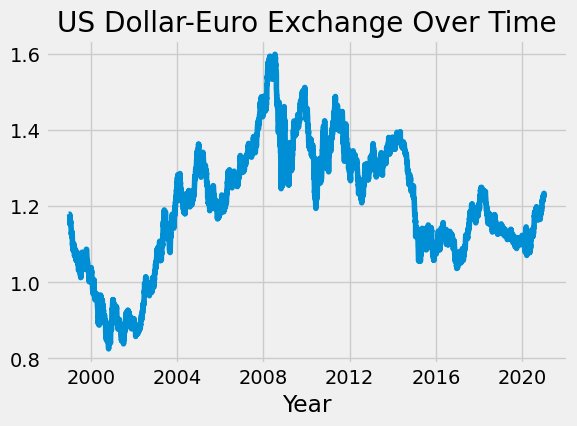

In [31]:
plt.plot(euro_to_dollar['Time'],euro_to_dollar['US_dollar'])
plt.xlabel('Year')
plt.title('US Dollar-Euro Exchange Over Time')
plt.show()

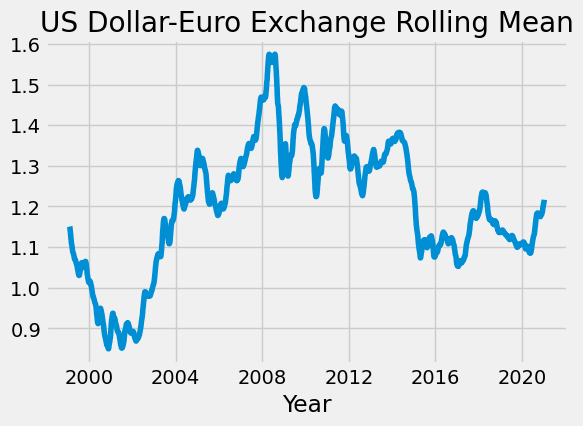

In [32]:
plt.plot(euro_to_dollar['Time'],euro_to_dollar['rolling_mean'])
plt.xlabel('Year')
plt.title('US Dollar-Euro Exchange Rolling Mean')
plt.show()

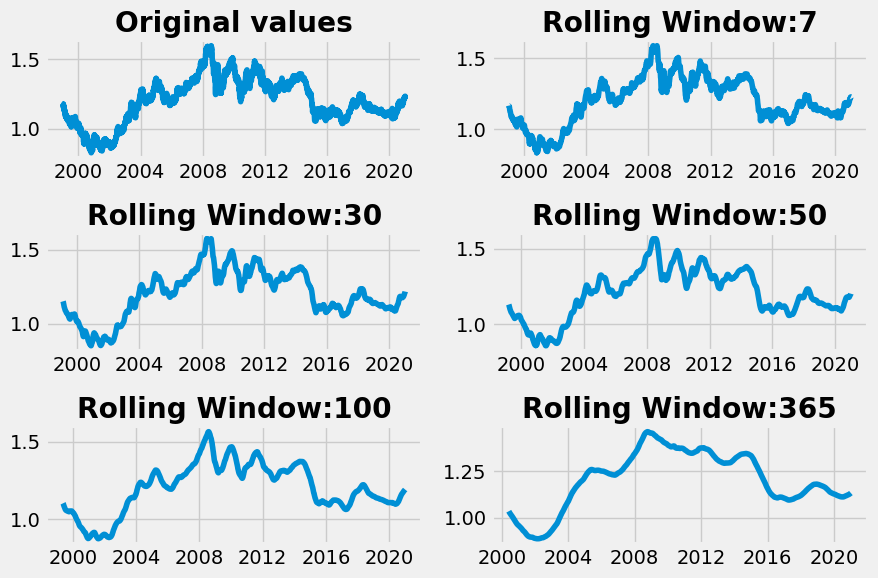

In [33]:
plt.figure(figsize=(9,6))

plt.subplot(3,2,1)
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.title('Original values', weight='bold')

for i, rolling_mean in zip([2, 3, 4, 5, 6],
                           [7, 30, 50, 100, 365]):
    plt.subplot(3,2,i)
    plt.plot(euro_to_dollar['Time'],
             euro_to_dollar['US_dollar'].rolling(rolling_mean).mean())
    plt.title('Rolling Window:' + str(rolling_mean), weight='bold')
    
plt.tight_layout() # Auto-adjusts the padding between subplots
plt.show()

## Storytelling data visualization

* To create a story, remember that we need to arrange our data into a series of events that show change

Now that we know what story we want to tell, we're going to think more about how the graph is going to look.

First, we need to choose the right graph type. The graph should give our story the visual form it needs — we don't want to choose a histogram to visually represent a time series.

Equally important, we need to choose something that our audience will be familiar with. To simplify your work, you can choose any audience you want for your graph.

Next, we're going to sketch the graph — we do this before writing the code. In sketching the graph, it's important to use some of the principles we've learned so far:

* Maximize the data-ink ratio.
* Create visual patterns using Gestalt principles.
* Guide the audience's attention using pre-attentive attributes.

These design principles can help you in two ways:

* They generate design options.
* They help you choose among those options.

In [20]:
# Explore the Euro-USD rate between 2006 and 2010
df = euro_to_dollar[euro_to_dollar['Time'].dt.year < 2010]

df = df[df['Time'].dt.year >= 2006]


financial_crisis = df[(df['Time'].dt.year >= 2007) & (df['Time'].dt.year <= 2008)]

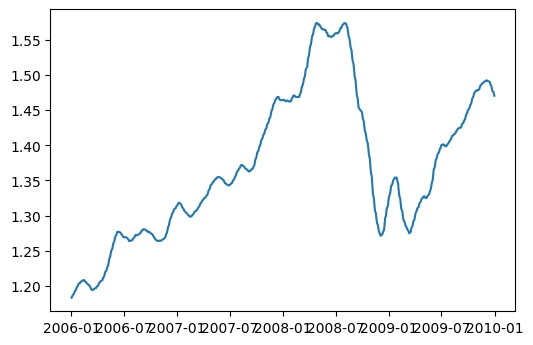

In [21]:
plt.plot(df['Time'],df['rolling_mean'])
plt.show()

In [22]:
df.reset_index(inplace=True)
financial_crisis.reset_index(inplace=True)

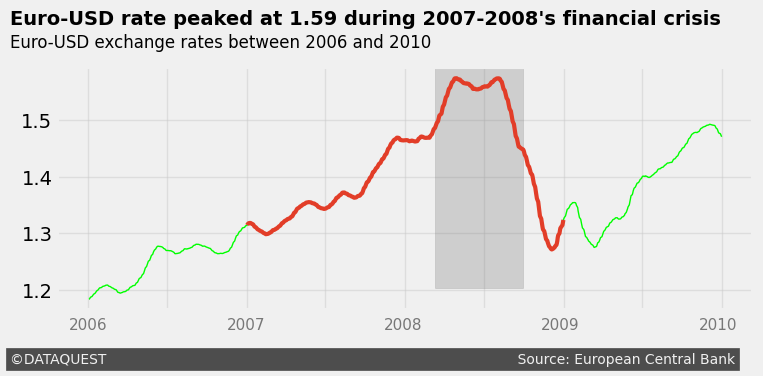

In [23]:
import matplotlib.style as style
style.use('fivethirtyeight')


fig, ax = plt.subplots(figsize=(8,3))

# Overall Map
ax.plot(df['Time'],df['rolling_mean'], linewidth=1, color = '#00FF00')

# Financial Crisis
ax.plot(financial_crisis['Time'],financial_crisis['rolling_mean'],
        linewidth=3,color = '#e23d28')

#print(ax.get_xticks())
#[732312. 732493. 732677. 732858. 733042. 733224. 733408. 733589. 733773.]
#ax.get_yticks()
### Highlihting the peak of the crisis
ax.axvspan(xmin=(733042+70), xmax=(733224+90.5), ymin=0.09, alpha=0.3, color='grey')

### Adding separate tick labels
ax.set_xticklabels([])
#ax.set_yticklabels([])

x = (732312-45)
for year in ['2006','2007', '2008','2009','2010']:
    ax.text(x, 1.13, year, alpha=0.5, fontsize=11)
    x += 363

### Adding a title and a subtitle    
ax.text((732312-181), 1.67, "Euro-USD rate peaked at 1.59 during 2007-2008's financial crisis",
        weight='bold')
ax.text((732312-181), 1.63, 'Euro-USD exchange rates between 2006 and 2010',
        size=12)

### Adding a signature
ax.text((732312-181), 1.07, '©DATAQUEST' + ' '*94 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=10)

### Add some transparency to the grid
ax.grid(alpha=0.5)

plt.show()

In [24]:
# Create Dataframes for President years

bush = euro_to_dollar[(euro_to_dollar['Time'].dt.year >= 2001) & (euro_to_dollar['Time'].dt.year < 2009)]

obama = euro_to_dollar[(euro_to_dollar['Time'].dt.year >= 2009) & (euro_to_dollar['Time'].dt.year < 2017)]

trump = euro_to_dollar[(euro_to_dollar['Time'].dt.year >= 2017) & (euro_to_dollar['Time'].dt.year < 2021)]

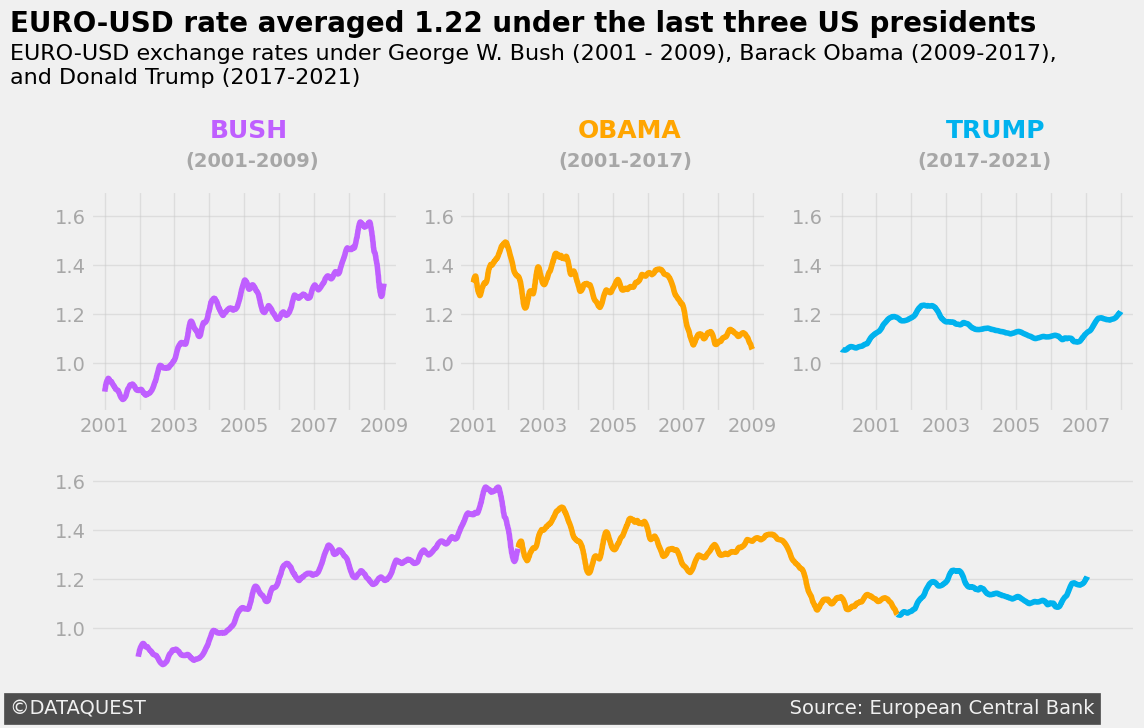

In [25]:
### Adding the FiveThirtyEight style
style.use('fivethirtyeight')

### Adding the subplots
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3, ax4]

### Changes to all the subplots
for ax in axes:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2','1.4', '1.6'],
                   alpha=0.3)
    ax.grid(alpha=0.5)  

# Plot the Years
ax1.plot(bush['Time'],bush['rolling_mean'], color = '#BF5FFF')
ax2.plot(obama['Time'],obama['rolling_mean'], color = '#ffa500')
ax3.plot(trump['Time'],trump['rolling_mean'], color = '#00B2EE')


#print(ax1.get_xticks())

# Format the graphs
ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '',
                     '2007', '', '2009'],
                   alpha=0.3)
ax1.text(731581, 1.92, 'BUSH', fontsize=18, weight='bold', color='#BF5FFF')
ax1.text((731581-250), 1.8, '(2001-2009)', weight='bold', alpha=0.3)

ax2.set_xticklabels(['', '2001', '', '2003', '', '2005', '',
                     '2007', '', '2009'],
                   alpha=0.3)
ax2.text(734503, 1.92, 'OBAMA', fontsize=18, weight='bold', color='#ffa500')
ax2.text((734503-200), 1.8, '(2001-2017)', weight='bold', alpha=0.3)

ax3.set_xticklabels(['', '2001', '', '2003', '', '2005', '',
                     '2007', '', '2009'],
                   alpha=0.3)
ax3.text(736876, 1.92, 'TRUMP', fontsize=18, weight='bold', color='#00B2EE')
ax3.text((736876-150), 1.8, '(2017-2021)', weight='bold', alpha=0.3)



ax4.plot(bush['Time'],bush['rolling_mean'], color = '#BF5FFF')
ax4.plot(obama['Time'],obama['rolling_mean'], color = '#ffa500')
ax4.plot(trump['Time'],trump['rolling_mean'], color = '#00B2EE')
ax4.grid(alpha=0.5)
ax4.set_xticks([])

### Adding a title and a subtitle
ax1.text(729500, 2.35, 'EURO-USD rate averaged 1.22 under the last three US presidents',
         fontsize=20, weight='bold')
ax1.text(729500, 2.14, '''EURO-USD exchange rates under George W. Bush (2001 - 2009), Barack Obama (2009-2017),
and Donald Trump (2017-2021)''',
        fontsize=16)

ax4.text(729500, 0.65, '©DATAQUEST' + ' '*103 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=14)

plt.show()

In [26]:
(731216-731581)/2

-182.5

## Covid Era Data Visualization on Exchange Rates

In [27]:
# Covid Era

covid_era = euro_to_dollar[euro_to_dollar['Time'].dt.year >= 2019]

In [28]:
covid_recession =  euro_to_dollar[euro_to_dollar['Time'].dt.year == 2020]

covid_recession = covid_recession[(covid_recession['Time'].dt.month >= 2) & (covid_recession['Time'].dt.month < 4)]

In [29]:
covid_recession.head()

,Time,US_dollar,rolling_mean
5459,2020-02-03,1.1066,1.110730
5460,2020-02-04,1.1048,1.110500
5461,2020-02-05,1.1023,1.110253
5462,2020-02-06,1.1003,1.110013
5463,2020-02-07,1.0969,1.109643


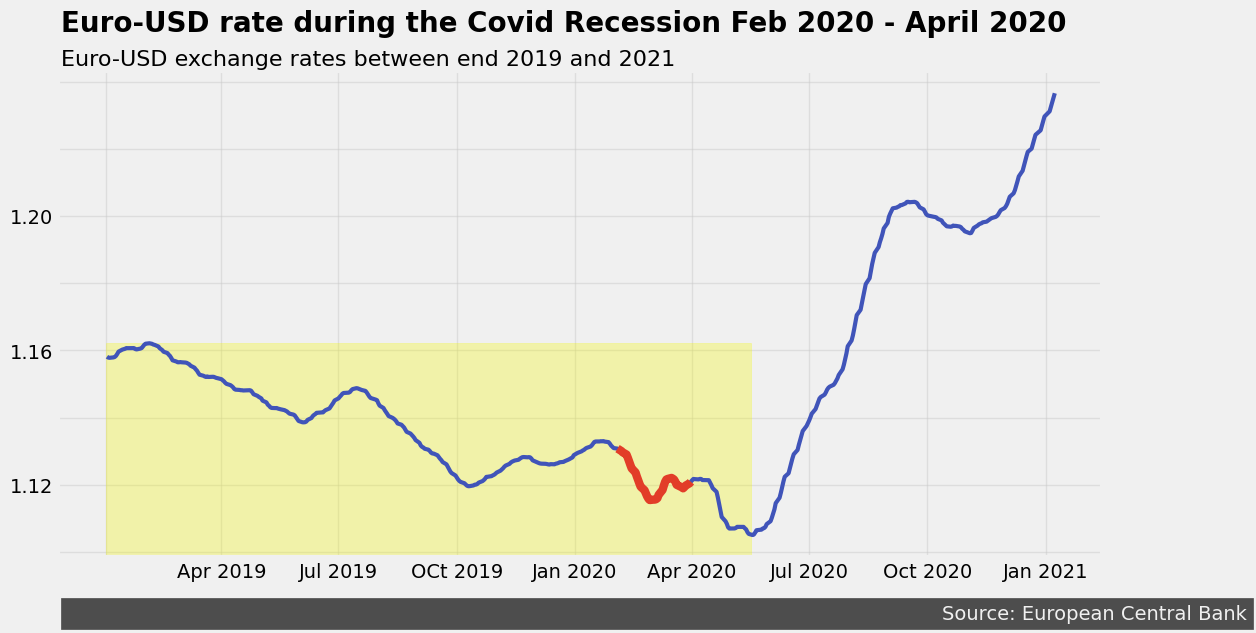

In [30]:
style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(12,6))

# Overall Map
ax.plot(covid_era['Time'],covid_era['rolling_mean'], linewidth=3, color = '#4054B9')

# Covid Recession
ax.plot(covid_recession['Time'],covid_recession['rolling_mean'],
        linewidth=6,color = '#e23d28')

#print(ax.get_xticks())

### Highlihting the peak of the Recession
ax.axvspan(xmin=(737150-90), xmax=(737516+45.5), ymin=0.,ymax=0.44,
           alpha=0.3,color='#F4F707')# color='grey')


ax.text((737150-125), 1.235, "Euro-USD rate during the Covid Recession Feb 2020 - April 2020",
        weight='bold',fontsize=20)
ax.text((737150-125), 1.225, 'Euro-USD exchange rates between end 2019 and 2021',
        size=16)
ax.grid(alpha=0.5)


ax.set_yticklabels(['1.08', '', '1.12', '', '1.16', '', '1.20',
                     ''])

ax.set_xticklabels(['', 'Apr 2019', 'Jul 2019', 'OCt 2019', 'Jan 2020',
                    'Apr 2020', 'Jul 2020','Oct 2020',
                     'Jan 2021'])

ax.text((737150-120), 1.06, ' '*140 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=14)

plt.show()